## Introduction to Clustering Algorithms

Clustering is an unsupervised machine learning technique used to group similar data points into clusters, where data points in the same cluster are more similar to each other than to those in other clusters. It is commonly used in exploratory data analysis, customer segmentation, pattern recognition, and more.

In this notebook, we will explore the concept of clustering, its types, and common clustering algorithms such as K-Means and DBSCAN.

---

## Table of Contents:

1. [What is Clustering?](#1-what-is-clustering)
2. [Types of Clustering Algorithms](#2-types-of-clustering-algorithms)
3. [K-Means Clustering](#3-k-means-clustering)
4. [DBSCAN Clustering](#4-dbscan-clustering)
5. [Use Cases of Clustering](#5-use-cases-of-clustering)
6. [Implementing Clustering in Python](#6-implementing-clustering-in-python)
7. [Evaluating Clustering Algorithms](#7-evaluating-clustering-algorithms)

---

## 1. What is Clustering?

Clustering is a task of dividing the data points into groups, such that data points in the same group are more similar to each other than to those in other groups. It is a form of unsupervised learning since the data has no labels or predefined groups.

### Key Concepts:
- **Centroid**: The center of a cluster.
- **Distance Metrics**: Metrics used to measure the similarity between data points (e.g., Euclidean distance, Manhattan distance).

---

## 2. Types of Clustering Algorithms

Clustering algorithms can be broadly categorized into:
- **Partitioning Algorithms**: Divides data into distinct non-overlapping clusters (e.g., K-Means).
- **Density-Based Algorithms**: Forms clusters based on regions of high density (e.g., DBSCAN).
- **Hierarchical Algorithms**: Builds clusters in a hierarchical manner (e.g., Agglomerative Clustering).

---

## 3. K-Means Clustering

### How K-Means Works:
1. **Initialization**: Choose `k` centroids randomly.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recompute the centroids based on the assigned points.
4. **Repeat**: Repeat the assignment and update steps until the centroids do not change.

### Pros:
- Simple and fast.
- Works well when clusters have a spherical shape.

### Cons:
- Sensitive to initial centroid placement.
- Requires the number of clusters to be specified in advance.

---

## 4. DBSCAN Clustering

### How DBSCAN Works:
1. **Core Points**: Points with at least `min_samples` neighbors within `eps` distance.
2. **Border Points**: Points that are neighbors of core points but do not have enough neighbors to be core points themselves.
3. **Noise Points**: Points that are neither core nor border points.

### Pros:
- Can find arbitrarily shaped clusters.
- Does not require specifying the number of clusters in advance.
- Resistant to noise.

### Cons:
- Sensitive to the choice of `eps` and `min_samples` parameters.

---

## 5. Use Cases of Clustering

Clustering is widely used in several applications:
- **Customer Segmentation**: Grouping customers based on purchasing behavior.
- **Anomaly Detection**: Identifying unusual patterns in data.
- **Document Clustering**: Grouping similar documents for information retrieval.

---


## 6. Implementing Clustering in Python

In this section, we will implement K-Means and DBSCAN using `scikit-learn`.

### K-Means Clustering Example:

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [12]:
X,_ = make_blobs(centers=4)

model = KMeans()
model.fit(X)

c:\Users\Gökdeniz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

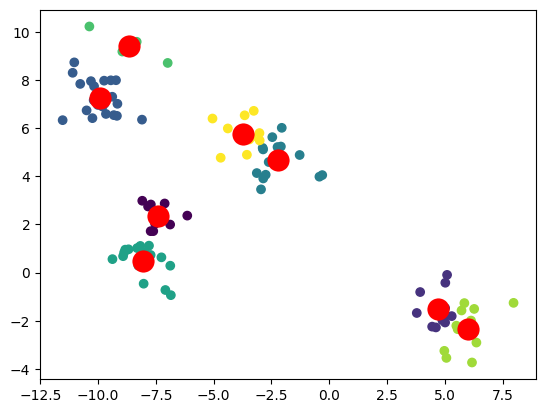

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=model.labels_,cmap="viridis")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="red",linewidths=10)
plt.show()

### DBSCAN Clustering Example:

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [17]:
X_scaled = StandardScaler().fit_transform(X)
model_db = DBSCAN()
labels = model_db.fit_predict(X_scaled)

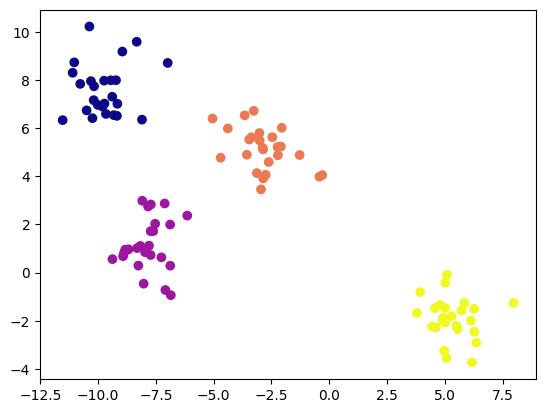

In [19]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap="plasma")
plt.show()

## 7. Evaluating Clustering Algorithms
Clustering evaluation can be tricky since there are no predefined labels. Some common evaluation metrics include:

- Silhouette Score: Measures how similar each point is to its own cluster compared to other clusters.
- Inertia: Sum of squared distances of points from their respective cluster centers (used in K-Means).
- Adjusted Rand Index: Measures the similarity between the predicted and true clusters (if true labels are available).

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, model.labels_)
print(f"Silhouette Score for K-Means: {silhouette_avg:.2f}")


Silhouette Score for K-Means: 0.41
